# 🎓 Life After Graduation EDA

This notebook explores how degree level, major field, and institution affect graduate outcomes such as employment rate, earnings, and debt.

## 📦 1. Load Libraries
We start by importing essential Python libraries for data analysis and visualization.

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 🧹 2. Data Cleaning
In this section, we clean invalid values (e.g., negative earnings or out-of-range employment rates) and handle missing data.

In [2]:
# Load input data
df = pd.read_csv("../data/life_after_graduation.csv")

In [3]:
# Get the basic information of the input dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   institution_name  800 non-null    object 
 1   major_field       768 non-null    object 
 2   degree_level      800 non-null    object 
 3   median_earnings   800 non-null    int64  
 4   employment_rate   789 non-null    float64
 5   debt_median       776 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 37.6+ KB


In [4]:
# Find the missing values in each column.
df.isnull().sum()

institution_name     0
major_field         32
degree_level         0
median_earnings      0
employment_rate     11
debt_median         24
dtype: int64

In [5]:
# Fill the NaN valuse in major field by mode.
major_field_mode = df['major_field'].mode()[0]
df['major_field'] = df['major_field'].fillna(major_field_mode)

## 📊 3. Exploratory Data Analysis (EDA)
We analyze trends in earnings, employment rates, and debt across different majors and degrees.

In [6]:
# Replace negative or >1 employment_rate values with NaN
df['employment_rate'] = df['employment_rate'].apply(lambda x: x if 0 <= x <= 1 else np.nan)

In [7]:
# Group-wise median imputation (by major_field + degree_level)
df['employment_rate'] = df.groupby(['major_field', 'degree_level'])['employment_rate'].transform(lambda x: x.fillna(x[x.notna() & (x >= 0) & (x <= 1)].median()))

In [8]:
# Convert debt median column to float.
df['debt_median'] = pd.to_numeric(df['debt_median'], errors='coerce')

In [9]:
# Replace NaN in debt median column by median from major field and degree level.
debt_median_values = df.groupby(['major_field', 'degree_level'])['debt_median'].transform('median')
df['debt_median'] = df['debt_median'].fillna(debt_median_values) 

(array([ 33., 115., 136.,  93.,  91.,  87.,  83.,  82.,  52.,  15.]),
 array([ 40536. ,  48422.8,  56309.6,  64196.4,  72083.2,  79970. ,
         87856.8,  95743.6, 103630.4, 111517.2, 119404. ]),
 <BarContainer object of 10 artists>)

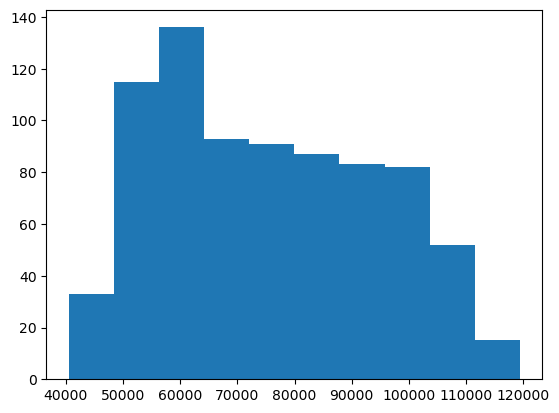

In [10]:
# Earning should not be negative. So, identifing the distribution is skewed or normal distribution.
positive_earning_df = df.loc[df['median_earnings']>0]
plt.hist(positive_earning_df['median_earnings'])

In [11]:
# Fill the values less than zero as nan, so the median won't affect.
df['median_earnings'] = df['median_earnings'].apply(lambda x: x if x > 0 else np.nan)

In [12]:
# Group-wise median imputation using transform
df['median_earnings'] = df.groupby(['major_field', 'degree_level'])['median_earnings'].transform(lambda x: x.fillna(x.median()))

In [13]:
# Store the cleaned output csv file.
df.to_csv("../outputs/life_after_graduation_cleaned.csv", index=False)

## 📈 4. Visualizations
We create visual plots to better understand the patterns and outliers in the dataset.

### Bar Plot: Median Earnings by Degree Level

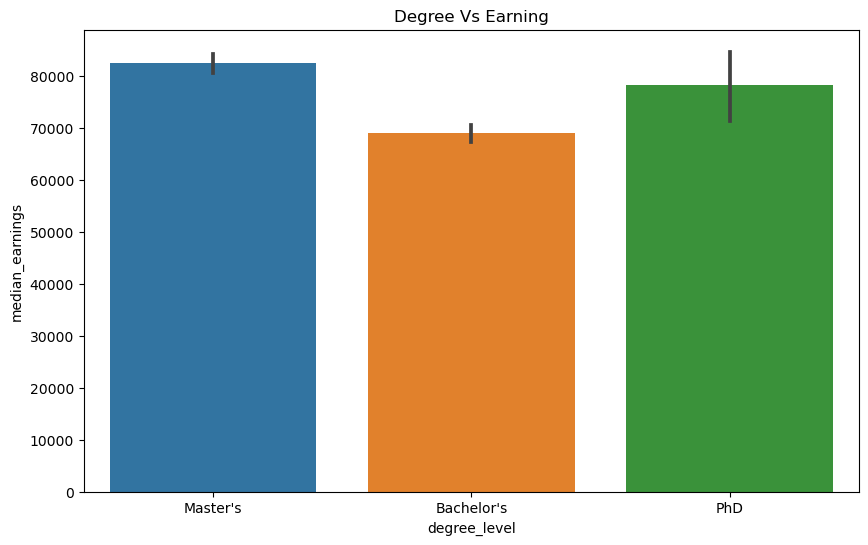

In [14]:
plt.figure(figsize=(10, 6)) # Set figure size
sns.barplot(x='degree_level', y='median_earnings', data=df)
plt.title('Degree Vs Earning')
plt.show()

### Box Plot: Debt by Major Field

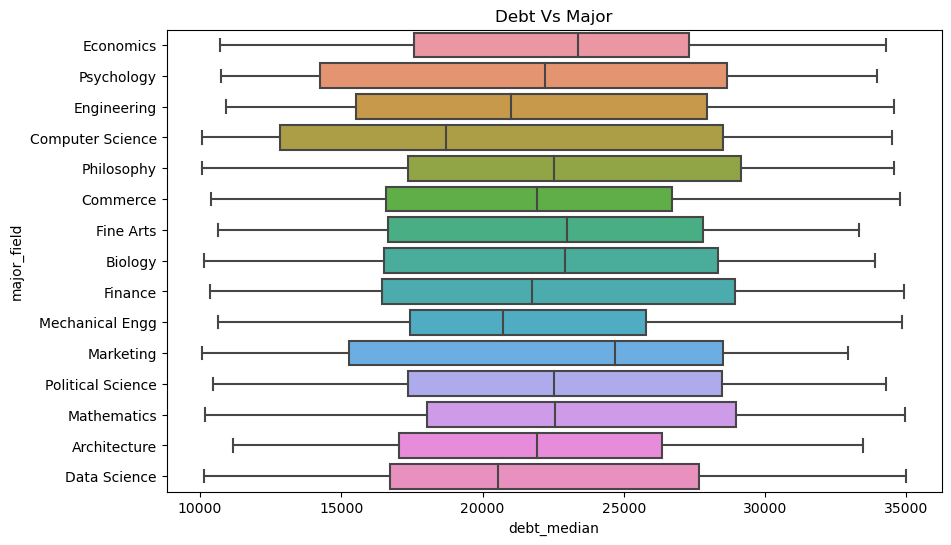

In [15]:
plt.figure(figsize=(10, 6)) # Set figure size
sns.boxplot(x='debt_median', y='major_field', data=df)
plt.title('Debt Vs Major')
plt.show()

### Bar Plot: Employment Rate by Major Field

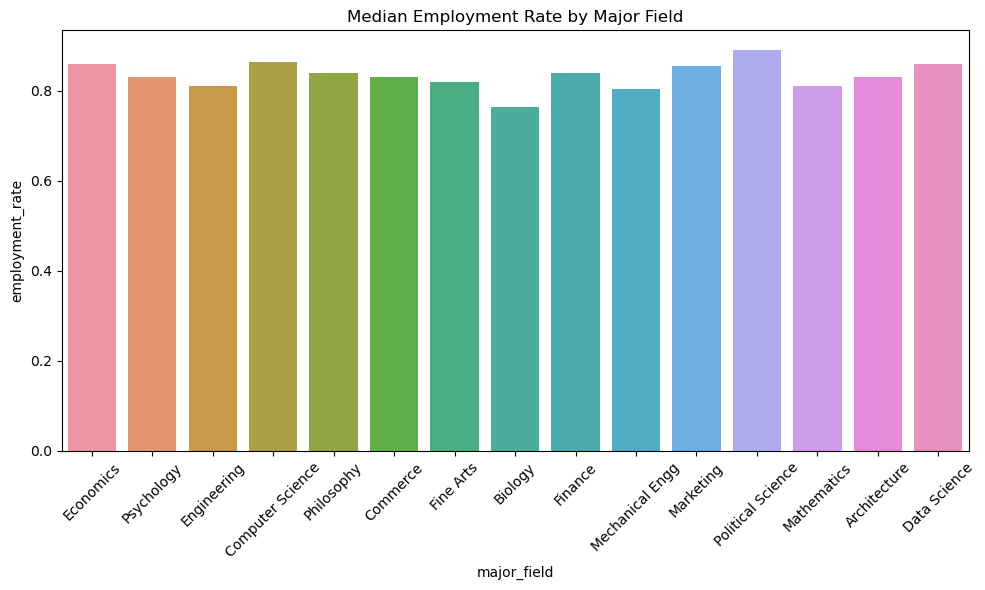

In [16]:
plt.figure(figsize=(10, 6)) # Set figure size
sns.barplot(data=df, x='major_field', y='employment_rate', estimator='median', errorbar=None)
plt.xticks(rotation=45)
plt.title("Median Employment Rate by Major Field")
plt.tight_layout()
plt.show()

## ✅ 5. 🧠 Insights and Observations

🎓 Graduates with a **PhD** degree have the **highest median earnings**, averaging around **$79,710**, as seen in the Degree vs. Earnings chart.

💼 **Political Science** majors show the **highest median employment rate**, reaching approximately **89.0%**, based on the Employment Rate by Major chart.

💸 Students majoring in **Marketing** incur the **highest median student debt**, around **$24,694**, as shown in the Debt vs. Major box plot.

📊 The **overall average median earnings** across all graduates is around **\$75,426** with an **average employment rate of 83.0%**, and a **median debt of $22,249**.

## ✅ 6. Conclusion
Final thoughts on graduate outcomes and recommendations for further exploration.

This exploratory data analysis provided meaningful insights into how educational background influences post-graduation outcomes. We observed that:

* Degree level plays a crucial role in earning potential, with PhD holders having the highest median salaries.

* Certain majors like Political Science show strong employment prospects, while others lead to higher financial burdens due to student debt.

* The average graduate earns a respectable income and secures employment at a promising rate, but debt levels remain a critical concern for many.

These insights can help students, educators, and policymakers make more informed decisions regarding higher education choices. Further analysis could incorporate additional features like tuition cost, location, and long-term career growth for deeper recommendations.